# AI 資料科學期末報告
1. 資料來源：https://www.kaggle.com/c/3rd-ml100marathon-midterm/submissions
2. 預測類型：分類
3. 

In [61]:
%%html
<img src='enron.png',width=200,height=200>

# 匯入模型建立以及資料

In [1]:
import copy 
import warnings
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
%matplotlib inline

# 載入資料

In [2]:
df_train = pd.read_csv('final/train_data.csv')

# 觀察資料欄位
1. 資料類型
2. 空值狀況
3. 統計數據

In [3]:
df_train.head(20)

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,...,NaN,2856.0,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,...,NaN,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,COLWELL WESLEY,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,...,NaN,101740.0,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,...,71023.0,200308.0,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [4]:
print("Data Shape:",df_train.shape)
print("各欄位空值狀況：")
print(df_train.isnull().sum())

Data Shape: (113, 22)
各欄位空值狀況：
name                           0
bonus                         52
deferral_payments             85
deferred_income               79
director_fees                100
email_address                 30
exercised_stock_options       32
expenses                      40
from_messages                 48
from_poi_to_this_person       48
from_this_person_to_poi       48
loan_advances                111
long_term_incentive           64
other                         44
poi                            0
restricted_stock              31
restricted_stock_deferred    103
salary                        40
shared_receipt_with_poi       48
to_messages                   48
total_payments                17
total_stock_value             15
dtype: int64


# 空值比例

In [5]:
df_train.isnull().sum() / df_train.shape[0]

name                         0.000000
bonus                        0.460177
deferral_payments            0.752212
deferred_income              0.699115
director_fees                0.884956
email_address                0.265487
exercised_stock_options      0.283186
expenses                     0.353982
from_messages                0.424779
from_poi_to_this_person      0.424779
from_this_person_to_poi      0.424779
loan_advances                0.982301
long_term_incentive          0.566372
other                        0.389381
poi                          0.000000
restricted_stock             0.274336
restricted_stock_deferred    0.911504
salary                       0.353982
shared_receipt_with_poi      0.424779
to_messages                  0.424779
total_payments               0.150442
total_stock_value            0.132743
dtype: float64

In [6]:
df_train.dtypes

name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

# 統計數據

In [7]:
df_train.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


# 相關係數

In [8]:
corr_data = df_train[['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value']]
corr_data= corr_data.corr()

In [9]:
corr_data

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.237136,-0.330737,NaN,0.594937,0.021938,0.049639,0.583681,0.354130,1.0,0.641973,0.451920,0.242170,0.419615,0.996185,0.640474,0.468583,0.320745,0.604374,0.580021
deferral_payments,0.237136,1.000000,-0.851942,NaN,-0.176132,-0.307285,0.587327,0.022899,0.454676,NaN,-0.182344,-0.130699,-0.251548,-0.132140,-0.422262,-0.144616,-0.019920,0.090151,-0.053491,-0.135273
deferred_income,-0.330737,-0.851942,1.000000,-0.444693,-0.312343,0.116174,-0.485967,0.048235,-0.237202,NaN,-0.158929,0.063684,-0.224654,-0.071059,-0.435360,-0.152183,-0.136257,-0.176297,0.001370,-0.258476
director_fees,NaN,NaN,-0.444693,1.000000,0.996742,-0.886696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,-0.410643,0.997476
exercised_stock_options,0.594937,-0.176132,-0.312343,0.996742,1.000000,0.032578,-0.073316,0.147001,-0.017950,1.0,0.501403,0.574068,0.591972,0.699631,-0.649735,0.632202,0.172783,0.083291,0.602021,0.963453
expenses,0.021938,-0.307285,0.116174,-0.886696,0.032578,1.000000,0.124164,-0.068010,-0.009286,1.0,-0.128675,0.047877,0.136386,0.069723,-0.602307,0.118565,0.306604,0.226298,0.110787,0.076095
from_messages,0.049639,0.587327,-0.485967,NaN,-0.073316,0.124164,1.000000,0.204521,0.640444,-1.0,-0.105937,-0.097809,-0.126760,-0.015121,0.880726,0.012728,0.261270,0.488072,-0.033241,-0.049772
from_poi_to_this_person,0.583681,0.022899,0.048235,NaN,0.147001,-0.068010,0.204521,1.000000,0.596773,1.0,0.166574,-0.002266,0.127932,0.098152,0.123231,0.116987,0.655800,0.510586,0.142822,0.125084
from_this_person_to_poi,0.354130,0.454676,-0.237202,NaN,-0.017950,-0.009286,0.640444,0.596773,1.000000,1.0,0.022941,-0.109500,-0.096864,0.045342,0.865845,0.042706,0.579677,0.691934,0.008497,-0.001550
loan_advances,1.000000,NaN,NaN,NaN,1.000000,1.000000,-1.000000,1.000000,1.000000,1.0,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000


# 觀察嫌疑犯以及非嫌疑犯的欄位資料 - 相關係數

In [10]:
poi_ = df_train.loc[df_train['poi']==True]
n_poi = df_train.loc[df_train['poi']==False]

In [11]:
corr_poi = poi_[['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value']]
corr_poi= corr_poi.corr()

In [12]:
corr_poi

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.385697,0.017499,NaN,0.904192,0.004441,0.101049,0.179508,0.093938,NaN,0.874173,0.708351,NaN,0.949322,NaN,0.973492,0.587513,0.853744,0.796501,0.924652
deferral_payments,0.385697,1.000000,-0.253406,NaN,-0.457238,0.215076,0.480492,-0.926452,0.647761,NaN,NaN,0.536547,NaN,0.427983,NaN,0.412352,0.528566,0.325787,0.542982,0.169903
deferred_income,0.017499,-0.253406,1.000000,NaN,-0.295776,-0.158493,0.417753,0.300730,0.500844,NaN,0.121906,0.206837,NaN,0.015450,NaN,-0.067503,0.186567,0.250227,0.185933,-0.229736
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exercised_stock_options,0.904192,-0.457238,-0.295776,NaN,1.000000,-0.002926,-0.029053,0.806868,-0.126761,NaN,0.987149,0.546954,NaN,0.918590,NaN,0.825360,0.492401,0.713309,0.601765,0.975887
expenses,0.004441,0.215076,-0.158493,NaN,-0.002926,1.000000,-0.366201,-0.276691,-0.360252,NaN,-0.275787,0.257605,NaN,0.142593,NaN,0.003034,0.334510,0.177354,0.245138,0.086447
from_messages,0.101049,0.480492,0.417753,NaN,-0.029053,-0.366201,1.000000,0.342451,0.675509,NaN,-0.180948,-0.258834,NaN,-0.110264,NaN,0.094001,0.535834,0.424002,-0.180062,-0.162035
from_poi_to_this_person,0.179508,-0.926452,0.300730,NaN,0.806868,-0.276691,0.342451,1.000000,-0.058809,NaN,0.103716,0.077438,NaN,0.068020,NaN,0.062830,0.392042,0.421421,0.140153,-0.018860
from_this_person_to_poi,0.093938,0.647761,0.500844,NaN,-0.126761,-0.360252,0.675509,-0.058809,1.000000,NaN,0.142513,-0.113975,NaN,-0.028308,NaN,0.103869,0.282043,0.241168,-0.053516,-0.081662
loan_advances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
corr_npoi = n_poi[['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value']]
corr_npoi= corr_npoi.corr()

In [14]:
corr_npoi

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.800590,-0.897147,NaN,0.163318,-0.004230,0.124701,0.745388,0.524566,NaN,0.400461,-0.021756,NaN,-0.004173,0.996185,0.216809,0.504877,0.343081,0.883277,0.121693
deferral_payments,0.800590,1.000000,-0.832225,NaN,0.131348,-0.295598,0.564617,0.289829,0.519538,NaN,-0.114403,-0.105004,NaN,0.090686,-0.422262,-0.012753,0.104985,0.214421,0.432848,0.141458
deferred_income,-0.897147,-0.832225,1.000000,-0.444693,-0.300003,0.183169,-0.797430,-0.188676,-0.571594,NaN,-0.191212,-0.167557,NaN,-0.155993,-0.435360,-0.197484,-0.383591,-0.496503,-0.767847,-0.297989
director_fees,NaN,NaN,-0.444693,1.000000,0.996742,-0.886696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,-0.410643,0.997476
exercised_stock_options,0.163318,0.131348,-0.300003,0.996742,1.000000,-0.163212,-0.001909,0.343185,0.187221,NaN,0.117217,0.463249,NaN,0.416348,-0.649735,-0.135786,0.108681,0.030594,0.241906,0.879655
expenses,-0.004230,-0.295598,0.183169,-0.886696,-0.163212,1.000000,0.152160,-0.043178,0.010484,NaN,-0.203210,-0.217020,NaN,0.006287,-0.602307,0.137201,0.302510,0.244919,-0.042257,-0.047696
from_messages,0.124701,0.564617,-0.797430,NaN,-0.001909,0.152160,1.000000,0.234792,0.636966,NaN,-0.084959,-0.138351,NaN,0.124204,0.880726,0.151847,0.288675,0.495838,0.102846,0.067162
from_poi_to_this_person,0.745388,0.289829,-0.188676,NaN,0.343185,-0.043178,0.234792,1.000000,0.649991,NaN,0.176383,-0.158475,NaN,0.121311,0.123231,0.146351,0.672717,0.528632,0.563460,0.337971
from_this_person_to_poi,0.524566,0.519538,-0.571594,NaN,0.187221,0.010484,0.636966,0.649991,1.000000,NaN,0.061990,-0.179957,NaN,0.267087,0.865845,0.189768,0.614350,0.702048,0.382488,0.228684
loan_advances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 提出假設
1. 由於資料較少，特徵較少，因此透過觀察以及假設來增加特徵

# 假設-1 訊息來往次數與嫌疑犯可疑程度

In [15]:
print("非嫌疑犯收到嫌疑犯的訊息：")
print(n_poi[['from_poi_to_this_person']].describe())
print()
print("嫌疑犯收到其他嫌疑犯的訊息：")
print(poi_[['from_poi_to_this_person']].describe())

非嫌疑犯收到嫌疑犯的訊息：
       from_poi_to_this_person
count                56.000000
mean                 60.125000
std                  93.598575
min                   0.000000
25%                   9.500000
50%                  24.500000
75%                  68.750000
max                 528.000000

嫌疑犯收到其他嫌疑犯的訊息：
       from_poi_to_this_person
count                 9.000000
mean                 93.888889
std                  78.588238
min                  13.000000
25%                  42.000000
50%                  53.000000
75%                 123.000000
max                 240.000000


In [16]:
print("非嫌疑犯寄信給嫌疑犯：")
print(n_poi['from_this_person_to_poi'].describe())
print()
print("嫌疑犯寄給其他嫌疑犯：")
print(poi_['from_this_person_to_poi'].describe())

非嫌疑犯寄信給嫌疑犯：
count     56.000000
mean      43.517857
std       95.305250
min        0.000000
25%        0.000000
50%        5.000000
75%       29.750000
max      411.000000
Name: from_this_person_to_poi, dtype: float64

嫌疑犯寄給其他嫌疑犯：
count     9.000000
mean     18.777778
std      13.718398
min       4.000000
25%      11.000000
50%      15.000000
75%      25.000000
max      48.000000
Name: from_this_person_to_poi, dtype: float64


# 假設結論
1. 嫌疑犯並不會頻繁傳訊息給其他嫌疑犯，但是卻會收到許多其他嫌疑犯的訊息，此為邏輯謬論
2. 新增特徵：訊息來往不正常比(abnormal_message_rate)

In [17]:
poi_['from_messages'].describe()

count      9.000000
mean      60.444444
std       43.243818
min       16.000000
25%       36.000000
50%       40.000000
75%       82.000000
max      144.000000
Name: from_messages, dtype: float64

In [18]:
n_poi['from_messages'].describe()

count       56.000000
mean       815.928571
std       2219.689043
min         12.000000
25%         19.000000
50%         47.000000
75%        224.000000
max      14368.000000
Name: from_messages, dtype: float64

In [19]:
poi_['AMS'] = poi_['from_poi_to_this_person'] / poi_['from_messages']

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
poi_['AMS'].describe()

count    9.000000
mean     2.091753
std      1.868274
min      0.333333
25%      0.814815
50%      1.381944
75%      3.250000
max      6.000000
Name: AMS, dtype: float64

In [21]:
n_poi['AMS'] = n_poi['from_poi_to_this_person'] / n_poi['from_messages']

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
n_poi['AMS'].describe()

count    56.000000
mean      0.698796
std       1.428273
min       0.000000
25%       0.033453
50%       0.207391
75%       0.770833
max       8.833333
Name: AMS, dtype: float64

# 發現：嫌疑犯的訊息來往並沒有被記錄在from messages 

In [23]:
df_train['abnormal_message_rate'] = df_train['from_poi_to_this_person'] / df_train['from_messages']

In [24]:
df_train['abnormal_message_rate'].describe()

count    65.000000
mean      0.891667
std       1.557074
min       0.000000
25%       0.035062
50%       0.317073
75%       0.973684
max       8.833333
Name: abnormal_message_rate, dtype: float64

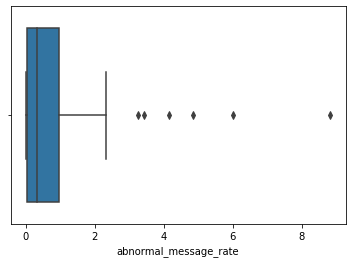

In [25]:
sns.boxplot(x=df_train['abnormal_message_rate'])

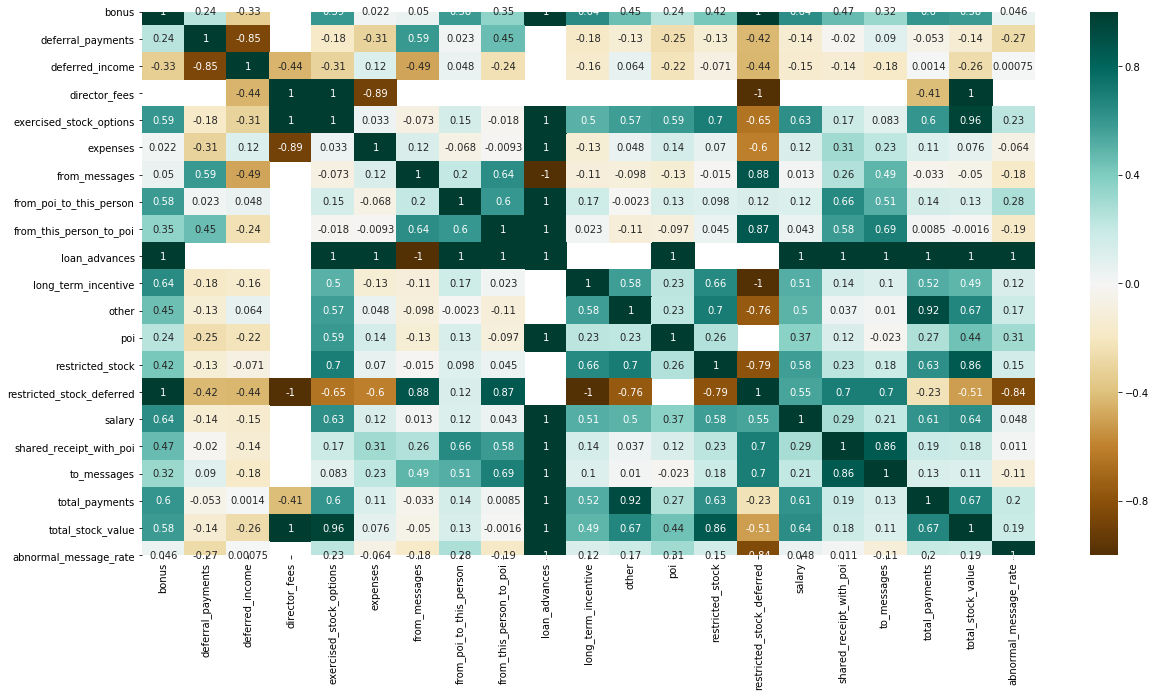

In [26]:
plt.figure(figsize=(20,10))
c= df_train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

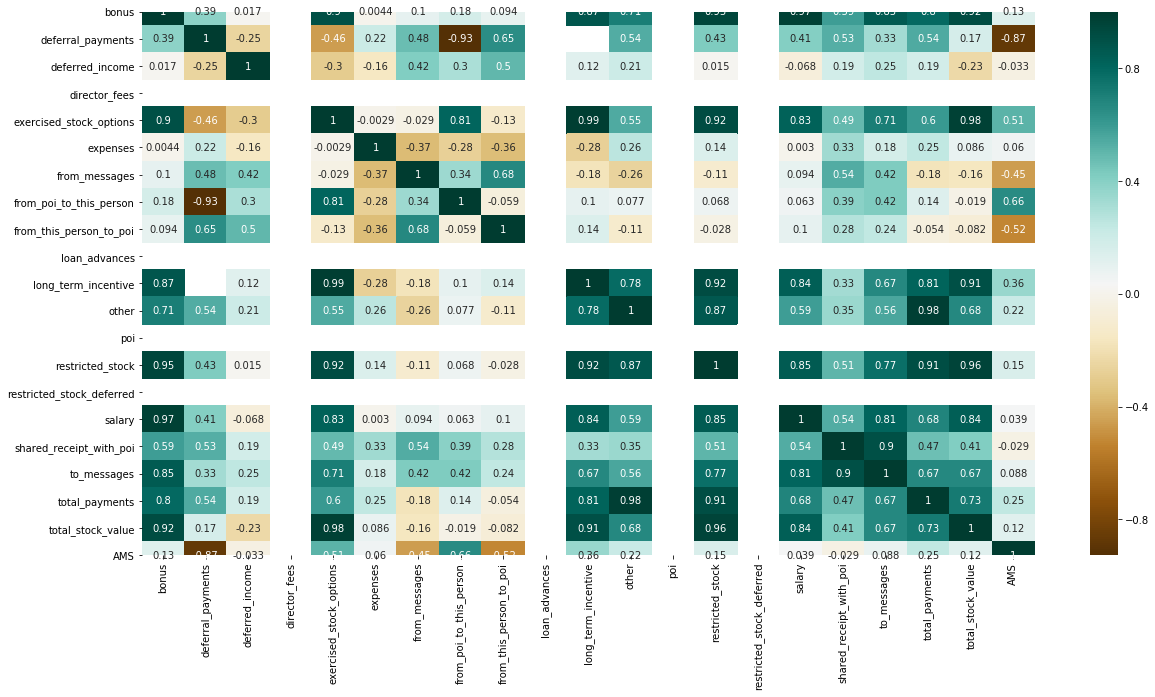

In [27]:
plt.figure(figsize=(20,10))
c= poi_.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


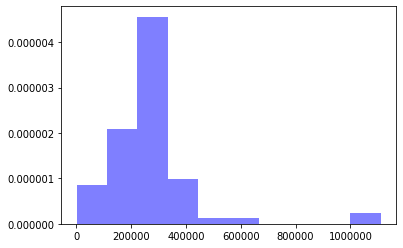

In [28]:
num_bins = 10
plt.hist(df_train['salary'], num_bins, normed=1, facecolor='blue', alpha=0.5)
plt.show()

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


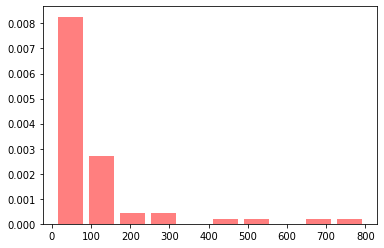

In [29]:
num_bins = 10
plt.hist(df_train['bonus']/10000, num_bins, normed=1, facecolor='red', alpha=0.5,rwidth=0.8)
plt.show()

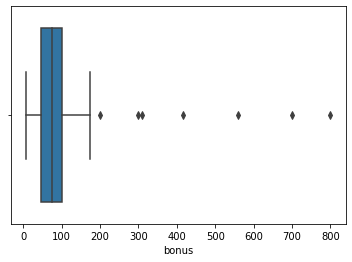

In [30]:
sns.boxplot(x=df_train['bonus']/10000)

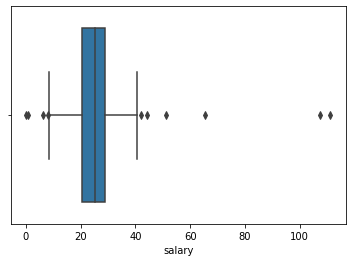

In [31]:
sns.boxplot(x=df_train['salary']/10000)

# 假設-2 : POI 和 Expense有相關性

In [32]:
poi_['salary'] = poi_['salary'].fillna(poi_['salary'].mean())
poi_['expenses'] = poi_['expenses'].fillna(poi_['expenses'].mean())

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
n_poi['salary'] = n_poi['salary'].fillna(n_poi['salary'].mean())
n_poi['expenses'] = n_poi['expenses'].fillna(n_poi['expenses'].mean())

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
poi_['expense_income_rate'] = poi_['expenses'] / poi_['salary']
n_poi['expense_income_rate'] = n_poi['expenses'] / n_poi['salary']

/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yu_hsuantseng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
poi_['expense_income_rate'].describe()

count    13.000000
mean      0.209857
std       0.164976
min       0.026399
25%       0.108023
50%       0.133511
75%       0.340568
max       0.526667
Name: expense_income_rate, dtype: float64

In [36]:
n_poi['expense_income_rate'].describe()

count    100.000000
mean       1.452219
std       11.797942
min        0.000602
25%        0.122380
50%        0.195458
75%        0.202360
max      118.031447
Name: expense_income_rate, dtype: float64

# 新增特徵

In [37]:
df_train['expense_income_rate'] = df_train['expenses'] /df_train['salary']

In [38]:
df_train = df_train.fillna(df_train.mean())

In [39]:
df_train.isnull().sum()

name                          0
bonus                         0
deferral_payments             0
deferred_income               0
director_fees                 0
email_address                30
exercised_stock_options       0
expenses                      0
from_messages                 0
from_poi_to_this_person       0
from_this_person_to_poi       0
loan_advances                 0
long_term_incentive           0
other                         0
poi                           0
restricted_stock              0
restricted_stock_deferred     0
salary                        0
shared_receipt_with_poi       0
to_messages                   0
total_payments                0
total_stock_value             0
abnormal_message_rate         0
expense_income_rate           0
dtype: int64

# 訓練模型 - KNN

In [40]:
df_submit = pd.DataFrame()

df_test = pd.read_csv('final/test_features.csv').fillna(0)
df = pd.read_csv('final/train_data.csv').fillna(0)

#df_train.set_index(['name'], inplace=True)
drop_feature = ['name']
df = df.drop(['email_address'], axis=1)

y_train = df['poi']
X_train = df.drop(['poi']+drop_feature, axis=1)

#df_test.set_index(['name'], inplace=True)
df_test = df_test.drop(['email_address'], axis=1)


df_submit['name'] = df_test['name']
X_test = df_test.drop(drop_feature, axis=1)

# 資料正則化(Normalization)

In [41]:
# Normalize the x_train, y_train
for col in X_train.columns:
    scaler = Normalizer()
    scaler.fit(X_train[col].values.reshape(-1,1))
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))



In [60]:
X_train.shape

(113, 19)

In [42]:
# knn auc score : 91
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  
knn.score(X_train,y_train)
y_knn_pred = knn.predict_proba(X_test) #predict datasets
y_score = y_knn_pred[:,1]

knn.score(X_train,y_train)  # model score


# get y_score
y_score = y_knn_pred[:,1]
df_submit['poi'] = y_score

In [43]:
#df_submit.to_csv('AI_Final_1230.csv',index=False)

In [44]:
%%html
<img src='kaggle_score.png',width=200,height=200>

# XGBoost Classifier

In [46]:
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
y_prediction = model.predict_proba(X_test)

In [49]:
df_submit = pd.DataFrame()

In [50]:
df_submit['name'] = df_test['name']

In [52]:
poi_ = []
for i in y_prediction:
    poi_.append(i[1])


In [53]:
df_submit['poi'] = poi_

In [54]:
df_submit.shape

(33, 2)

In [55]:
df_submit.to_csv("AI_final_2.csv",index=False)

In [58]:
%%html
<img src='final_score_2.png',width=200,height=200>